1) What was the change in price of the stock over time? <br>
2) What was the daily return of the stock on average? <br>
3) What was the moving average of the various stocks? <br>
4) What was the correlation between different stocks' closing prices? <br>
5) What was the correlation between different stocks' daily returns? <br>
6) How much value do we put at risk by investing in a particular stock? <br>
7) How can we attempt to predict future of stock behavious? <br>


In [2]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from pandas_datareader.data import DataReader
from datetime import datetime

In [3]:
#list of tech stocks
tech_stocks = ['AAPL','GOOG','MSFT','AMZN']

In [4]:
#end date ie today
end = datetime.now()

#start date - one year ago
start = datetime(end.year - 1, end.month, end.day)

In [5]:
for stock in tech_stocks:
    globals()[stock] = DataReader(stock,'yahoo',start,end)
    
#'globals' allows us to convert that stock string into a global dataframe variable
#that means AAPL will return the dataframe containing its stock info

In [6]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2019-05-28 to 2020-05-26
Data columns (total 6 columns):
High         252 non-null float64
Low          252 non-null float64
Open         252 non-null float64
Close        252 non-null float64
Volume       252 non-null float64
Adj Close    252 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


In [7]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,255.119325,249.379802,251.875039,252.479365,3.352329e+07,251.000651
std,43.709089,42.494782,42.953630,43.316296,1.721033e+07,43.771142
min,177.919998,170.270004,175.440002,173.300003,1.136200e+07,171.256134
25%,212.117500,207.317505,209.977501,209.145000,2.184540e+07,207.319828
50%,258.220001,249.270004,251.824997,255.315002,2.845690e+07,253.942772
75%,291.287506,284.092514,285.372490,289.040001,3.841992e+07,288.259697
max,327.850006,323.350006,324.739990,327.200012,1.067212e+08,326.316681


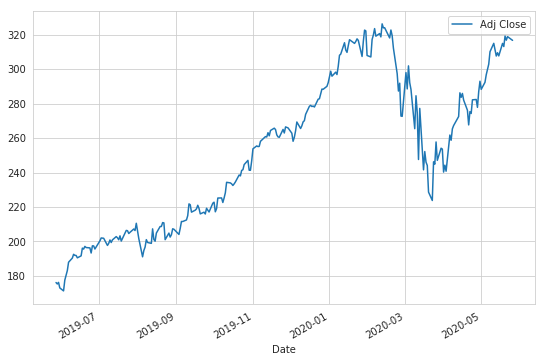

In [8]:
AAPL['Adj Close'].plot(legend=True,figsize=(9,6))

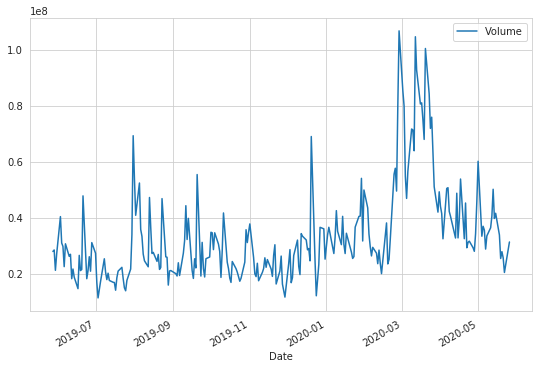

In [9]:
AAPL['Volume'].plot(legend=True,figsize=(9,6))

In [10]:
no_of_days = [10,20,50]

for days in no_of_days:
    column_name = f"Moving Average({days} days)"
    AAPL[column_name] = AAPL['Adj Close'].rolling(days).mean()

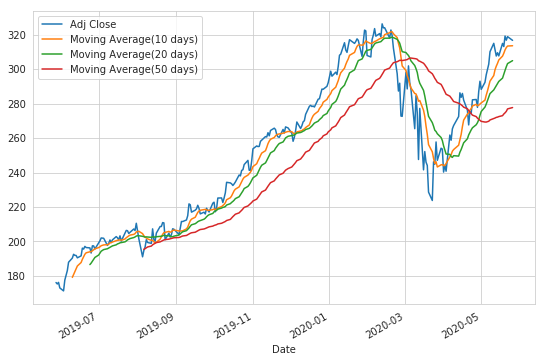

In [11]:
AAPL[['Adj Close','Moving Average(10 days)','Moving Average(20 days)','Moving Average(50 days)']].plot(subplots=False,figsize=(9,6))

Rolling Mean, Moving Average, Pandas Analysis

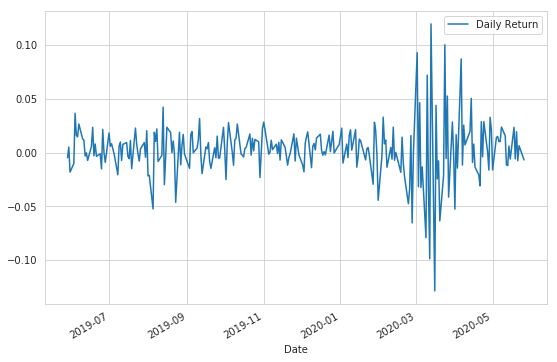

In [12]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(legend=True, figsize = (9,6))

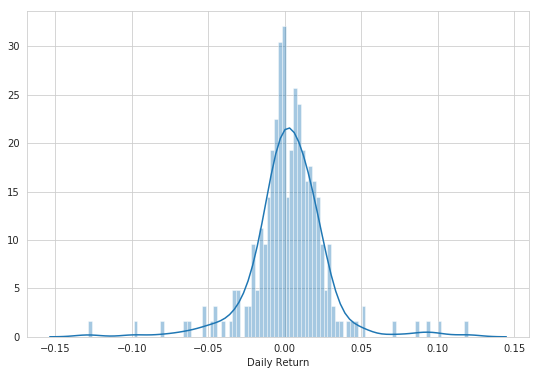

In [13]:
plt.figure(figsize=(9,6))
sns.distplot(AAPL['Daily Return'].dropna(),bins=100)

In [14]:
closing_prices_df=DataReader(tech_stocks,'yahoo',start,end)['Adj Close']

In [15]:
closing_prices_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-05-28,176.128006,1836.430054,1134.150024,124.626442
2019-05-29,175.288025,1819.189941,1116.459961,123.421265
2019-05-30,176.197189,1816.319946,1117.949951,124.201653
2019-05-31,173.005280,1775.069946,1103.630005,122.176575
2019-06-03,171.256134,1692.689941,1036.229980,118.383247


In [16]:
tech_stocks_returns = closing_prices_df.pct_change()
tech_stocks_returns.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-05-28,NaN,NaN,NaN,NaN
2019-05-29,-0.004769,-0.009388,-0.015598,-0.009670
2019-05-30,0.005187,-0.001578,0.001335,0.006323
2019-05-31,-0.018116,-0.022711,-0.012809,-0.016305
2019-06-03,-0.010110,-0.046409,-0.061071,-0.031048


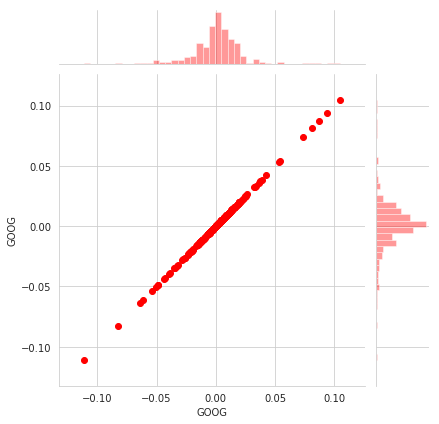

In [17]:
#Correlation of Google with Google which should be a perfect relation as the data points are the same
sns.jointplot('GOOG','GOOG',tech_stocks_returns,kind='scatter',color='red')

/home/deekay/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


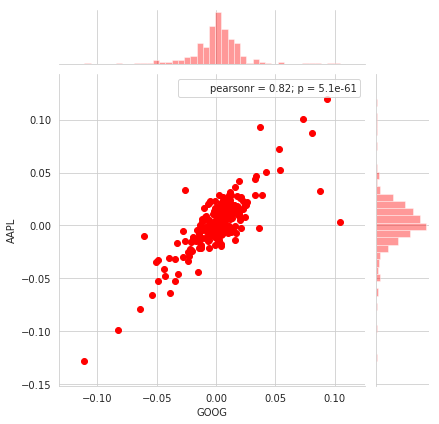

In [18]:
#Correlation of Google with Apple
sns.jointplot('GOOG','AAPL',tech_stocks_returns,kind='scatter',color='red').annotate(stats.pearsonr)

KDE and other plots as well as correlation, pearson r and pearplots


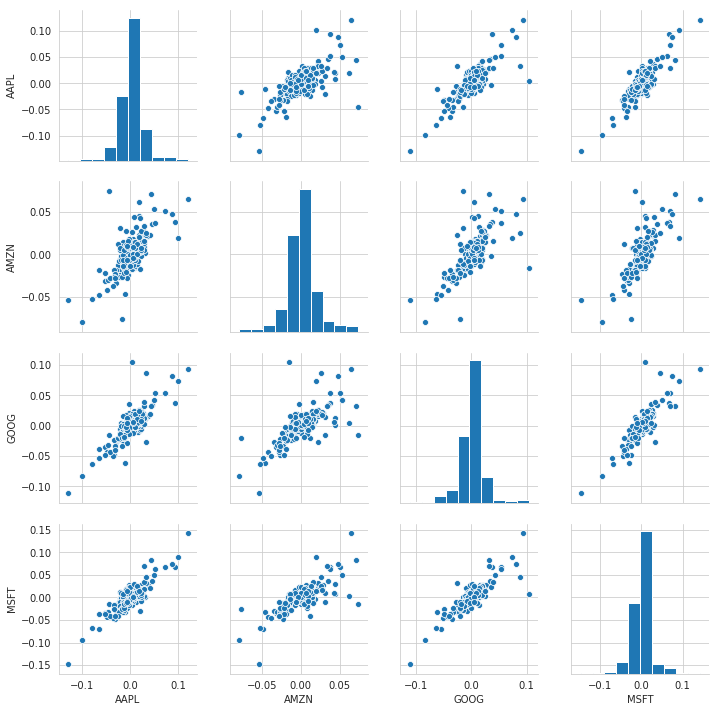

In [19]:
sns.pairplot(tech_stocks_returns.dropna())

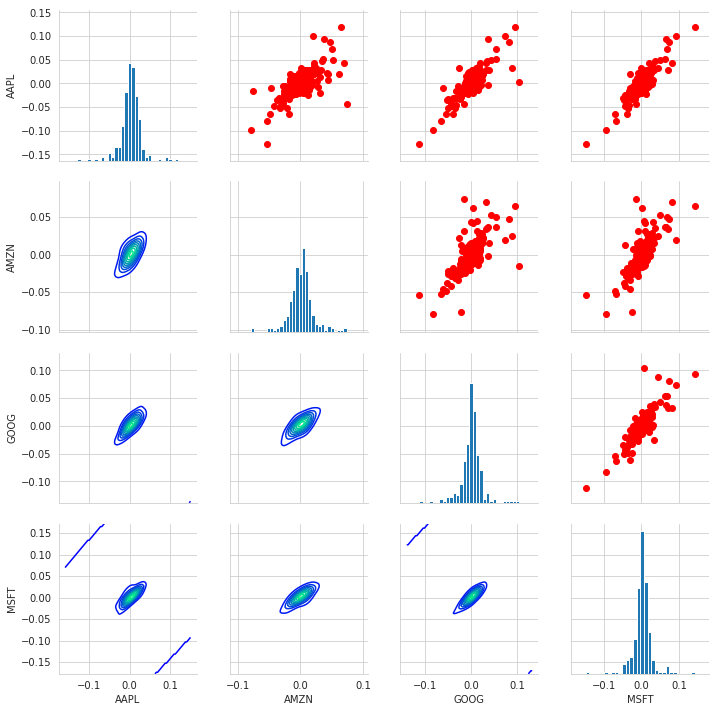

In [20]:
returns_fig = sns.PairGrid(tech_stocks_returns.dropna())
returns_fig.map_upper(plt.scatter,color='red')
returns_fig.map_lower(sns.kdeplot,cmap='winter')
returns_fig.map_diag(plt.hist, bins = 30)

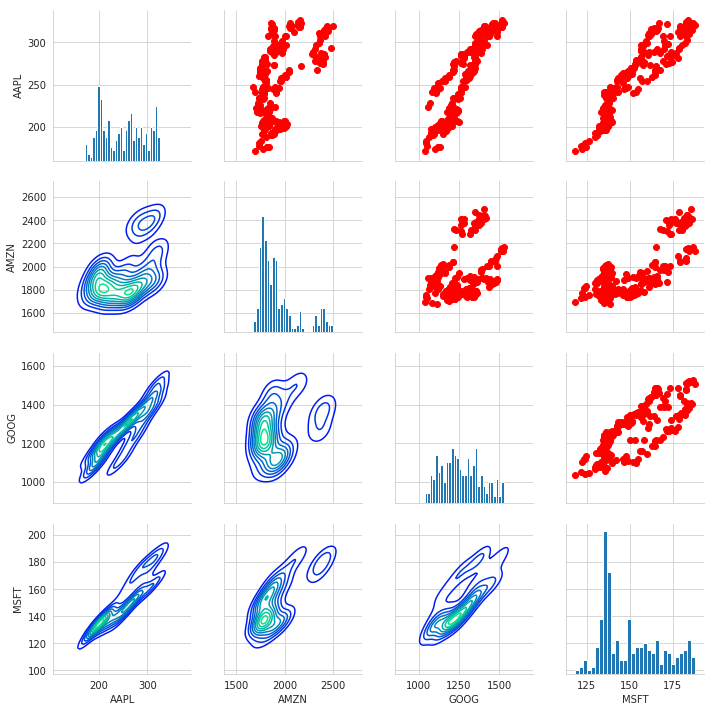

In [21]:
returns_fig = sns.PairGrid(closing_prices_df.dropna())
returns_fig.map_upper(plt.scatter,color='red')
returns_fig.map_lower(sns.kdeplot,cmap='winter')
returns_fig.map_diag(plt.hist, bins = 30)

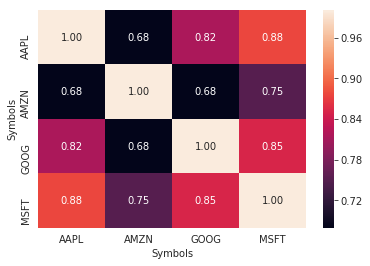

In [22]:
sns.heatmap(tech_stocks_returns.dropna().corr(),annot=True ,fmt='.2f')

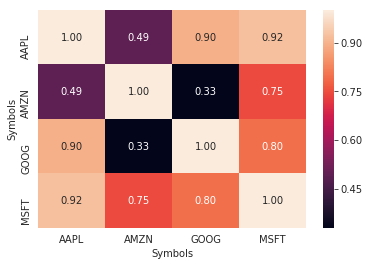

In [23]:
sns.heatmap(closing_prices_df.dropna().corr(),annot=True ,fmt='.2f')

<h3>Risk Analysis:<h5> using Standard Deviation</h5> </h3>


In [24]:
returns = tech_stocks_returns.dropna()

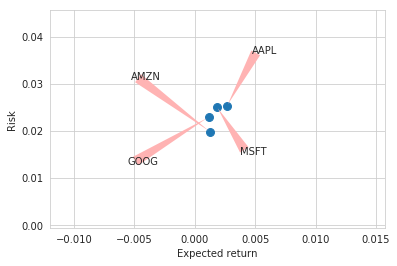

In [25]:
area = np.pi*20
plt.scatter(returns.mean(),returns.std(),s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')
xytext = [(50,50),(-50,50),(-50,-50),(50,-50)]

for label, x, y, xytext in zip(returns.columns, returns.mean(), returns.std(), xytext):
    plt.annotate(
        label, 
        xy = (x, y), xytext = xytext, textcoords = 'offset points',
        ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle="wedge,tail_width=1.",
                                  fc=(1.0, 0.7, 0.7), ec="none",
                                  patchA=None,
                                  relpos=(0.2, 0.5)))

annotate plt


 Value at Risk = Money that can be lost in a particular investment
 
 1) Bootstrap method <br>
 2) Monte Carlo Method
 
 <h3> 1)Bootstrap : </h3>

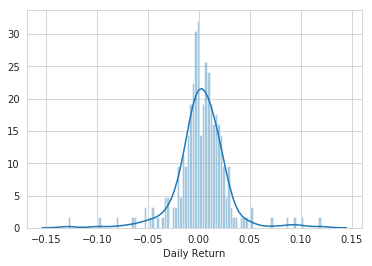

In [28]:
sns.distplot(AAPL['Daily Return'].dropna(), bins = 100)

In [30]:
returns.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-05-29,-0.004769,-0.009388,-0.015598,-0.009670
2019-05-30,0.005187,-0.001578,0.001335,0.006323
2019-05-31,-0.018116,-0.022711,-0.012809,-0.016305
2019-06-03,-0.010110,-0.046409,-0.061071,-0.031048
2019-06-04,0.036584,0.021782,0.016232,0.027704


In [32]:
returns['AAPL'].quantile(0.05)

-0.03315459757901379

The 0.05 empirical quantile of daily returns is at -0.033. That means that with 95% confidence, our worst daily loss will not exceed 3.3%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.033 * 1,000,000 = $33,000.

<h3>2) Monte Carlo Method: </h3>